# Neural Network Image processing

# mnist Dataset 

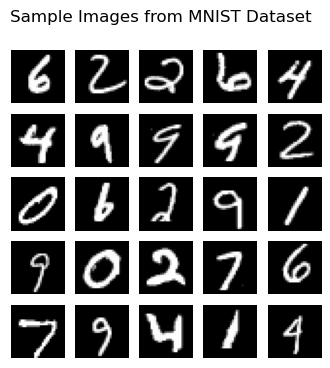

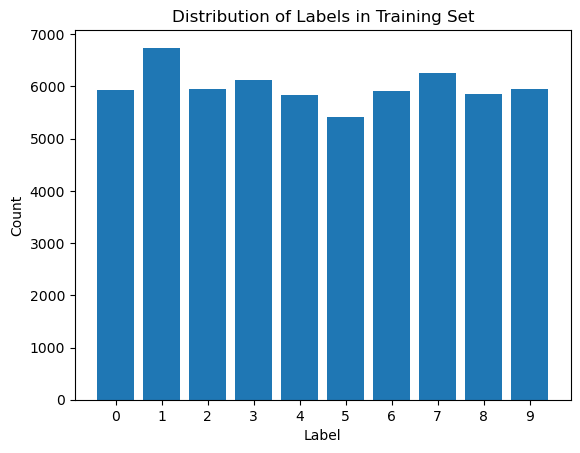

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# random 10 images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(4, 4))
for i, ax in enumerate(axes.flatten()):
    img = X_train[np.random.randint(0, len(X_train))]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.suptitle('Sample Images from MNIST Dataset')
plt.show()

# Plot the distribution of the labels in the training set
fig, ax = plt.subplots()
counts = np.bincount(y_train)
ax.bar(np.arange(len(counts)), counts)
ax.set_xticks(np.arange(len(counts)))
ax.set_xticklabels(np.arange(len(counts)))
ax.set_xlabel('Label')
ax.set_ylabel('Count')
ax.set_title('Distribution of Labels in Training Set')
plt.show()


# CNN Image Black and White

In [2]:
import numpy as np
import pandas as pd
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.utils import to_categorical

def build_cnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


def load_data():
    # Load the MNIST dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Reshape 
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

    # Convert and normalise
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255

    # one-hot encoding
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    
    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = load_data()

# Build the cNN model
input_shape = X_train.shape[1:]
cnn_model = build_cnn_model(input_shape)

# Train the model
cnn_history = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)

# Evaluate the model
loss, accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Epoch 1/10
469/469 [==============================] - 39s 80ms/step - loss: 0.2431 - accuracy: 0.9284 - val_loss: 0.0934 - val_accuracy: 0.9704
Epoch 2/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0590 - accuracy: 0.9822 - val_loss: 0.0423 - val_accuracy: 0.9861
Epoch 3/10
469/469 [==============================] - 35s 75ms/step - loss: 0.0408 - accuracy: 0.9875 - val_loss: 0.0416 - val_accuracy: 0.9854
Epoch 4/10
469/469 [==============================] - 29s 62ms/step - loss: 0.0325 - accuracy: 0.9898 - val_loss: 0.0329 - val_accuracy: 0.9890
Epoch 5/10
469/469 [==============================] - 31s 66ms/step - loss: 0.0273 - accuracy: 0.9914 - val_loss: 0.0313 - val_accuracy: 0.9907
Epoch 6/10
469/469 [==============================] - 35s 75ms/step - loss: 0.0215 - accuracy: 0.9932 - val_loss: 0.0301 - val_accuracy: 0.9907
Epoch 7/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0175 - accuracy: 0.9943 - val_loss: 0.0281 - val_accuracy:

# AUC ROC

In [7]:
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

def plot_roc_curve(model, X_test, y_test):
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    import matplotlib.pyplot as plt

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Compute the ROC curve and AUC for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(y_test.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = roc_auc_score(y_test, y_pred, average="micro")

    # Plot ROC curves
    plt.figure(figsize=(8, 6))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (AUC = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             linewidth=2)

    for i in range(y_test.shape[1]):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'
                                       ''.format(i, roc_auc[i]),
                 linewidth=2)

    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


313/313 [==============================] - 2s 2ms/step


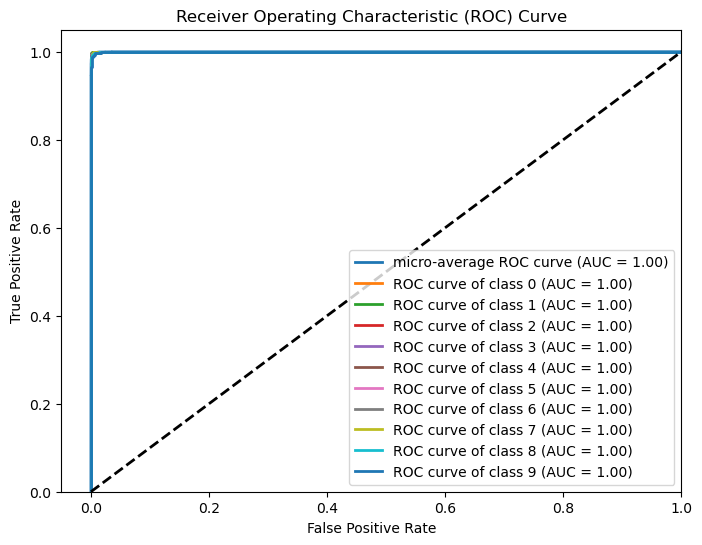

In [8]:
plot_roc_curve(cnn_model, X_test, y_test)


In [19]:
get_evaluation_matrics(rcnn_model, x_test, y_test)

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1000
           1       0.89      0.84      0.87      1000
           2       0.58      0.69      0.63      1000
           3       0.51      0.57      0.54      1000
           4       0.78      0.58      0.66      1000
           5       0.61      0.67      0.64      1000
           6       0.90      0.68      0.78      1000
           7       0.75      0.82      0.78      1000
           8       0.79      0.89      0.84      1000
           9       0.84      0.81      0.83      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000

Test loss: 0.7855373620986938
Test accuracy: 0.7315999865531921


# ***** CNN

In [1]:
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from keras.utils import to_categorical

def preprocess_data():
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()
    X_train = X_train.astype('float32') / 255
    X_test = X_test.astype('float32') / 255
    y_train = to_categorical(y_train, num_classes=10)
    y_test = to_categorical(y_test, num_classes=10)
    return X_train, X_test, y_train, y_test

def build_cnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def train_cnn_model():
    X_train, X_test, y_train, y_test = preprocess_data()
    input_shape = X_train.shape[1:]
    model = build_cnn_model(input_shape)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)
    return model, history


In [2]:
X_train, X_test, y_train, y_test = preprocess_data()
cnn_model = build_cnn_model(X_train.shape[1:])
cnn_history = train_cnn_model()
#print_classification_report(cnn_model, X_test, y_test)

Epoch 1/10
391/391 [==============================] - 24s 57ms/step - loss: 1.5383 - accuracy: 0.4435 - val_loss: 1.2628 - val_accuracy: 0.5507
Epoch 2/10
391/391 [==============================] - 24s 61ms/step - loss: 1.1073 - accuracy: 0.6105 - val_loss: 1.0075 - val_accuracy: 0.6471
Epoch 3/10
391/391 [==============================] - 28s 70ms/step - loss: 0.9283 - accuracy: 0.6758 - val_loss: 0.9774 - val_accuracy: 0.6604
Epoch 4/10
391/391 [==============================] - 25s 64ms/step - loss: 0.8239 - accuracy: 0.7132 - val_loss: 0.8384 - val_accuracy: 0.7125
Epoch 5/10
391/391 [==============================] - 28s 71ms/step - loss: 0.7341 - accuracy: 0.7473 - val_loss: 0.8131 - val_accuracy: 0.7243
Epoch 6/10
391/391 [==============================] - 26s 66ms/step - loss: 0.6797 - accuracy: 0.7650 - val_loss: 0.8006 - val_accuracy: 0.7329
Epoch 7/10
391/391 [==============================] - 27s 69ms/step - loss: 0.6089 - accuracy: 0.7883 - val_loss: 0.7721 - val_accuracy:

313/313 [==============================] - 1s 2ms/step


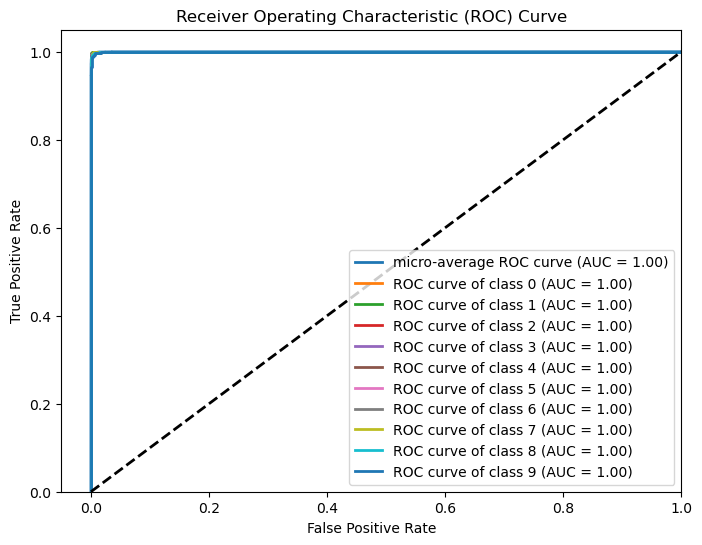

In [10]:
plot_roc_curve(cnn_model, X_test, y_test)

# ***** ResNet

In [2]:
import numpy as np
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.applications.resnet_v2 import ResNet50V2

def preprocess_data():
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()
    X_train = X_train.astype('float32') / 255
    X_test = X_test.astype('float32') / 255
    y_train = to_categorical(y_train, num_classes=10)
    y_test = to_categorical(y_test, num_classes=10)
    return X_train, X_test, y_train, y_test

def build_resnet_model(input_shape):
    inputs = Input(shape=input_shape)
    base_model = ResNet50V2(input_tensor=inputs, include_top=False, weights='imagenet', pooling='avg')
    x = base_model.output
    x = Dense(128, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def train_resnet_model():
    X_train, X_test, y_train, y_test = preprocess_data()
    input_shape = X_train.shape[1:]
    model = build_cnn_model(input_shape)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)
    return model, history


In [3]:
resnet_model,resnet_history = train_resnet_model()

Epoch 1/10
391/391 [==============================] - 972s 2s/step - loss: 1.3873 - accuracy: 0.5282 - val_loss: 1.4330 - val_accuracy: 0.5921
Epoch 2/10
391/391 [==============================] - 957s 2s/step - loss: 0.9280 - accuracy: 0.6935 - val_loss: 1.1547 - val_accuracy: 0.6478
Epoch 3/10
391/391 [==============================] - 861s 2s/step - loss: 0.7274 - accuracy: 0.7595 - val_loss: 0.8826 - val_accuracy: 0.7093
Epoch 4/10
391/391 [==============================] - 3563s 9s/step - loss: 0.6184 - accuracy: 0.7968 - val_loss: 0.9200 - val_accuracy: 0.7048
Epoch 5/10
391/391 [==============================] - 961s 2s/step - loss: 0.5317 - accuracy: 0.8264 - val_loss: 0.8961 - val_accuracy: 0.7048
Epoch 6/10
391/391 [==============================] - 1003s 3s/step - loss: 0.6862 - accuracy: 0.7834 - val_loss: 0.8915 - val_accuracy: 0.7158
Epoch 7/10
391/391 [==============================] - 1000s 3s/step - loss: 0.4832 - accuracy: 0.8417 - val_loss: 0.7749 - val_accuracy: 0.7

In [ ]:
plot_roc_curve(resnet_model, X_test, y_test)